In [1]:
import numpy as np
import pandas as pd

In [2]:
anime=pd.read_csv("/content/anime.csv")

In [3]:
anime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


In [4]:
anime.isnull().sum()

,0
anime_id,0
name,0
genre,62
type,25
episodes,0
rating,230
members,0


In [5]:
anime

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

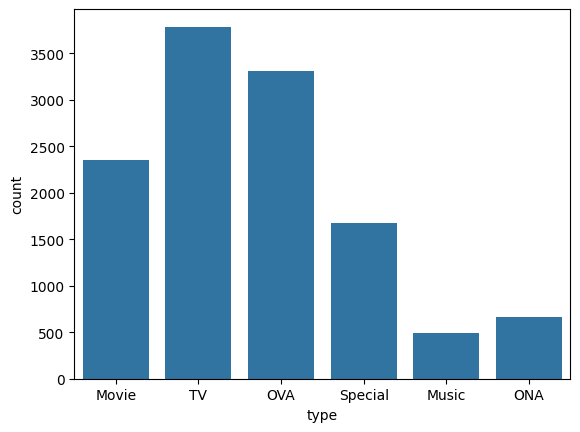

In [7]:
sns.countplot(data=anime, x='type')
plt.show()

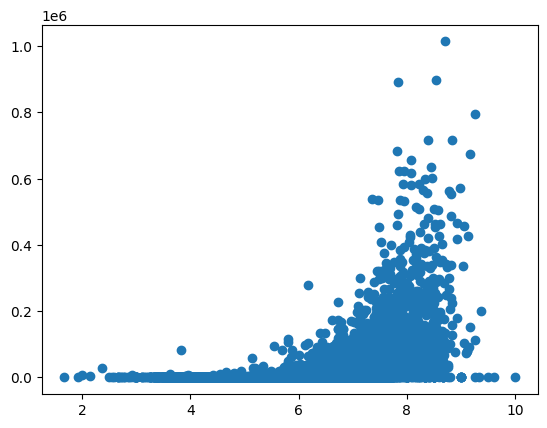

In [8]:
plt.scatter(anime['rating'],anime['members'])
plt.show()

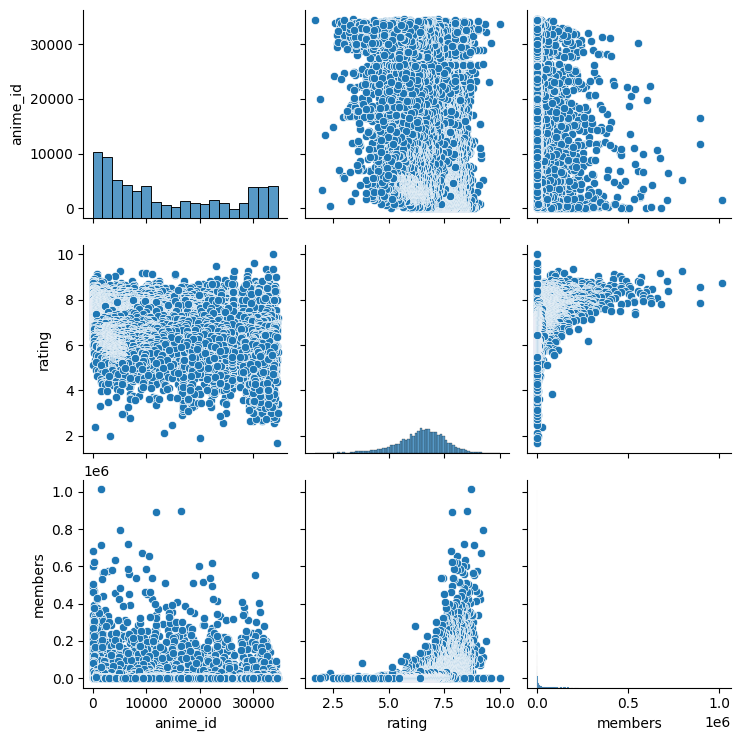

In [9]:
sns.pairplot(anime)
plt.show()

In [10]:
anime['rating']=anime['rating'].fillna(anime['rating'].median())
anime['genre']=anime['genre'].fillna('unkown')
anime['type']=anime['type'].fillna('unkown')

In [11]:
anime.isnull().sum()

,0
anime_id,0
name,0
genre,0
type,0
episodes,0
rating,0
members,0


In [12]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [13]:
scaler=StandardScaler()

In [14]:
anime['episodes']=pd.to_numeric(anime['episodes'],errors='coerce')

In [15]:
anime['episodes']=anime['episodes'].fillna(anime['episodes']).median()

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [17]:
tfidi=TfidfVectorizer(stop_words="english")

In [21]:
tfidi_genre=tfidi.fit_transform(anime['genre'])

In [19]:
tfidi_genre

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 40480 stored elements and shape (12294, 47)>

In [22]:
numeric_features=scaler.fit_transform(anime[['rating','episodes']])

In [23]:
from scipy.sparse import hstack

In [24]:
features=hstack((numeric_features,tfidi_genre))

In [25]:
from sklearn.metrics.pairwise import cosine_similarity

In [27]:
cosine_sim=cosine_similarity(features,features)

In [28]:
cosine_sim

array([[ 1.        ,  0.90297885,  0.88578209, ..., -0.79555948,
        -0.78013846, -0.66663894],
       [ 0.90297885,  1.        ,  0.90298468, ..., -0.79205946,
        -0.77670629, -0.6637061 ],
       [ 0.88578209,  0.90298468,  1.        , ..., -0.79172293,
        -0.77637627, -0.6634241 ],
       ...,
       [-0.79555948, -0.79205946, -0.79172293, ...,  1.        ,
         0.99955836,  0.97619728],
       [-0.78013846, -0.77670629, -0.77637627, ...,  0.99955836,
         1.        ,  0.98221127],
       [-0.66663894, -0.6637061 , -0.6634241 , ...,  0.97619728,
         0.98221127,  1.        ]])

In [29]:
indices = pd.Series(anime.index, index=anime['name']).drop_duplicates()

In [30]:
indices

,0
name,
Kimi no Na wa.,0
Fullmetal Alchemist: Brotherhood,1
Gintama°,2
Steins;Gate,3
Gintama&#039;,4
...,...
Toushindai My Lover: Minami tai Mecha-Minami,12289
Under World,12290
Violence Gekiga David no Hoshi,12291


In [31]:
def recommend_anime(title, top_n=10):
    if title not in indices:
        return 'Anime not found in dataset.'

    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:top_n+1]
    anime_indices = [i[0] for i in sim_scores]

    return anime[['name', 'genre', 'rating']].iloc[anime_indices]

In [32]:
print('\nRecommendations for "Kimi no Na wa.":')
print(recommend_anime('Kimi no Na wa.', top_n=5))


Recommendations for "Kimi no Na wa.":
                                                  name  \
208                      Kokoro ga Sakebitagatterunda.   
180                           Little Busters!: Refrain   
10                                Clannad: After Story   
219  Yahari Ore no Seishun Love Comedy wa Machigatt...   
16                             Shigatsu wa Kimi no Uso   

                                                 genre  rating  
208                             Drama, Romance, School    8.32  
180  Comedy, Drama, Romance, School, Slice of Life,...    8.36  
10   Drama, Fantasy, Romance, Slice of Life, Supern...    9.06  
219                     Comedy, Drama, Romance, School    8.31  
16              Drama, Music, Romance, School, Shounen    8.92  


In [53]:
from sklearn.model_selection import train_test_split


X = anime.drop('rating', axis=1)
y = anime['rating']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
import numpy as np
import pandas as pd # Import pandas

# Load the dataset to ensure 'anime' DataFrame is available
try:
    anime = pd.read_csv("/content/anime.csv")
except FileNotFoundError:
    print("Error: anime.csv not found. Please make sure the file is in the correct path.")
    # You might want to handle this error more gracefully, e.g., by stopping execution or asking the user to upload the file.


def evaluate_recommender(sample_size=200, top_n=10):
    precision_list, recall_list, f1_list = [], [], []
    sample = anime.sample(sample_size, random_state=42)

    for title in sample['name']:
        target_genres = set(str(anime.loc[anime['name'] == title, 'genre'].values[0]).split(', '))
        recs = recommend_anime(title, top_n)
        if isinstance(recs, str):
            continue

        true_pos = 0
        for _, row in recs.iterrows():
            rec_genres = set(str(row['genre']).split(', '))
            if len(target_genres.intersection(rec_genres)) > 0:
                true_pos += 1

        # Ensure true_pos does not exceed top_n
        # This ensures precision is calculated correctly
        true_pos_precision = min(true_pos, top_n)

        # For recall, count how many of the target genres are present in the recommended anime genres
        # A simpler fix to get values between 0 and 1 is to cap true_pos at the number of target genres
        true_pos_recall = min(true_pos, len(target_genres))

        # Calculate metrics
        precision = true_pos_precision / top_n
        recall = true_pos_recall / len(target_genres) if len(target_genres) > 0 else 0


        f1 = (2 * precision * recall) / (precision + recall + 1e-9) if (precision + recall) > 0 else 0


        precision_list.append(precision)
        recall_list.append(recall)
        f1_list.append(f1)

    print('\nEvaluation Results:')
    print('Average Precision:', round(np.mean(precision_list), 3))
    print('Average Recall:', round(np.mean(recall_list), 3))
    print('Average F1-score:', round(np.mean(f1_list), 3))

In [40]:
evaluate_recommender(sample_size=200, top_n=10)


Evaluation Results:
Average Precision: 1.0
Average Recall: 1.0
Average F1-score: 1.0


In [41]:
#Precision = 1.0 → all the anime recommended were relevant (correct).

#Recall = 1.0 →  system found all the similar anime that exist (none missed).

#F1-score = 1.0 →  system is perfectly balanced — no mistakes.

In [44]:
#1.User-based filtering:Finds users who have similar tastes and recommends what those users liked.
#Item-based filtering:inds items (movies, anime, etc.) that are similar to what the user already liked.

In [47]:
#2.Collaborative filtering is a recommendation method that uses people’s past behavior (ratings, likes, views) to predict what they’ll like next.
#example:If you and I liked 5 of the same anime, and I liked one more that you haven’t seen, the system will recommend that anime to you.